In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from array import array
import pickle
plt.ion()

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


#load in the database simulation (also a good check that you are reading the right database file!)
sim = db.get_simulation('cosmo25')

In [2]:
##getting the last time step
step = db.get_timestep('cosmo25/%8192')

In [3]:
def get_metal(arr1, metal_arr, tot_arr, i):
    delta_array = []
    delta_array = arr1[i][1:]-arr1[i][:-1]
    delta_array = np.append(arr1[i][0], delta_array)
    
    x = (np.nansum(delta_array * metal_arr[i]))/(tot_arr[i])
    
    return x

# Getting Iron Profile

In [4]:
tot_gas_mass, tot_stellar_mass, stellar_Fe_prof, gas_Ox_prof, star_mass_prof, gas_mass_prof, halo_num = step.calculate_all('Mgas',
                                                                                                                          'Mstar',
                                                                                                                          'star_Fe_profile',
                                                                                                                          'gas_Ox_profile',
                                                                                                                          'star_mass_profile',
                                                                                                                          'gas_mass_profile',
                                                                                                                          'halo_number()')
                                                                                                                          
                                                                                                                    

In [5]:
#stellar iron profile

stellar_Fe_dm = []
stellar_mass_steps = []

loop = np.arange(len(stellar_Fe_prof))

for i in loop:
    stellar_mass_steps = np.append(stellar_mass_steps, tot_stellar_mass[i])
    stellar_Fe_dm = np.append(stellar_Fe_dm, get_metal(star_mass_prof, stellar_Fe_prof, tot_stellar_mass, i))

In [11]:
def H_mass_frac(arrZ,i):
    x = 1 - arrZ[i] - (0.236 + (2.1 * arrZ[i]))
    return x

In [13]:
loop = np.arange(len(stellar_Fe_prof))

star_h = []

for i in loop:
    star_h = np.append(star_h, H_mass_frac(stellar_Fe_dm, i))

## Saving to Pickle

In [6]:
star_Fe_data = {'tot_stellar_mass' : stellar_mass_steps,
                'stellar_Fe_profile' : stellar_Fe_dm,
                'halo_number' : halo_num,
                'note': "total stellar mass and iron profile"}

f = open('stellar_Fe.pkl', 'wb')
pickle.dump(star_Fe_data, f)
f.close()

f = open('stellar_Fe.pkl', 'rb')
stellar_iron_pickle = pickle.load(f)
f.close()

### Plotting

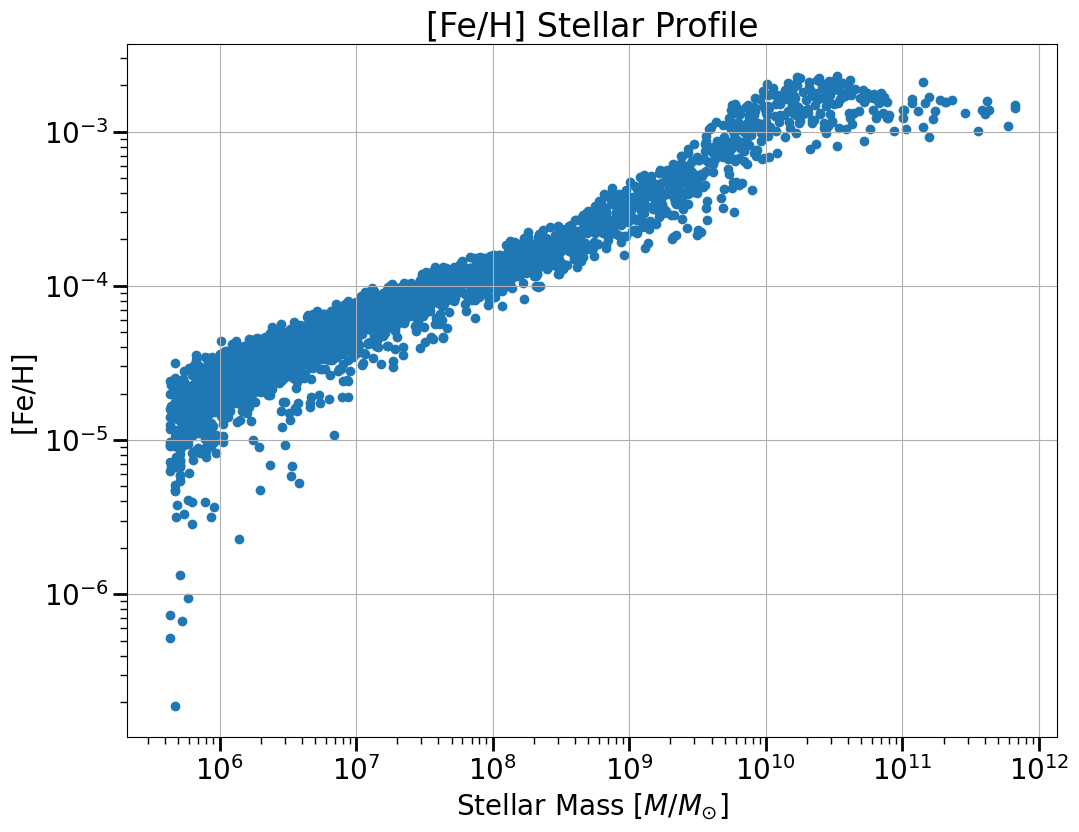

In [19]:
x_axis = stellar_iron_pickle['tot_stellar_mass']
y_axis = stellar_iron_pickle['stellar_Fe_profile']/star_h

plt.scatter(x_axis, y_axis)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('[Fe/H]')
plt.title('[Fe/H] Stellar Profile')

plt.grid()
#plt.show()
plt.savefig("./Pictures/star_fe_h.png", bbox_inches='tight')

# Getting Oxygen Profile

In [8]:
#gas oxygen profile

gas_Ox_dm = []
gas_mass_steps = []

loop = np.arange(len(gas_Ox_prof))

for i in loop:
    gas_mass_steps = np.append(gas_mass_steps, tot_gas_mass[i])
    gas_Ox_dm = np.append(gas_Ox_dm, get_metal(gas_mass_prof, gas_Ox_prof, tot_gas_mass, i))

In [16]:
loop = np.arange(len(gas_Ox_dm))

gas_h = []

for i in loop:
    gas_h = np.append(gas_h, H_mass_frac(gas_Ox_dm, i))

## Saving to pickle

In [9]:
gas_Ox_data = {'tot_gas_mass' : gas_mass_steps,
                'gas_Ox_profile' : gas_Ox_dm,
                'halo_number' : halo_num,
                'note': "total gas mass and oxygen profile"}

f = open('gas_Ox.pkl', 'wb')
pickle.dump(gas_Ox_data, f)
f.close()

f = open('gas_Ox.pkl', 'rb')
gas_oxygen_pickle = pickle.load(f)
f.close()

### Plotting

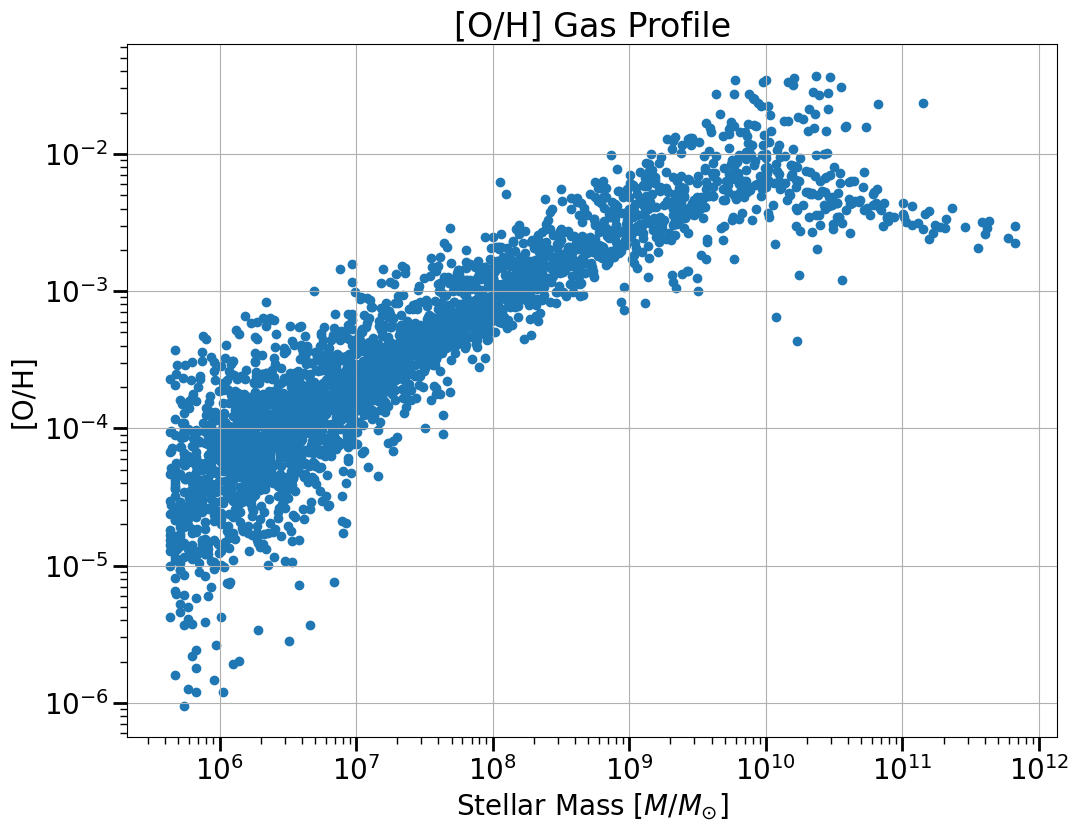

In [21]:
stellar_x_axis = stellar_iron_pickle['tot_stellar_mass']
gas_y_axis = gas_oxygen_pickle['gas_Ox_profile']/gas_h

plt.scatter(stellar_x_axis, gas_y_axis)

plt.xscale('log')
plt.yscale('log')

plt.title('[O/H] Gas Profile')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('[O/H]')

plt.grid()
#plt.show()
plt.savefig("./Pictures/gas_o_h.png", bbox_inches='tight')